In [128]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm 

import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical, plot_model
from keras.preprocessing import image
from keras import models, layers

from keras.applications import ResNet50
from keras.applications.vgg16 import preprocess_input

print("Importing libraries completed.")

Importing libraries completed.


In [156]:
#Loading MNIST dataset from keras
(Xtrain,ytrain),(Xtest, ytest)=keras.datasets.mnist.load_data()

In [157]:
#Verifying the size of the dataset
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Show MNIST image


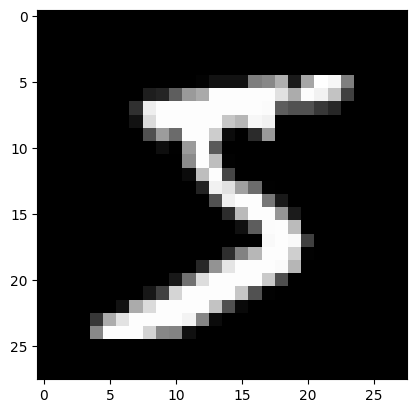

In [158]:
# Pick a sample to plot
print("Show MNIST image")
sample = 0
image = Xtrain[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [159]:
# Display data in an image
print("Data in an image")
print(Xtrain[0])

Data in an image
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 2

In [160]:
# Convert the data in 3 channels as MNIST data have 1 channel (black and white)
Xtrain=np.dstack([Xtrain] * 3)
Xtrain = Xtrain.reshape(-1, 28,28,3)
Xtest=np.dstack([Xtest] * 3)
Xtest = Xtest.reshape(-1, 28,28,3)
print(Xtrain.shape,Xtest.shape)
#print(Xtrain)

(60000, 28, 28, 3) (10000, 28, 28, 3)


In [161]:
# Resize the images 48*48 as required by the ResNet50
from tensorflow.keras.utils import img_to_array, array_to_img

Xtrain = np.asarray(tf.image.resize(Xtrain, [48,48])) # if we want to resize 
Xtest = np.asarray(tf.image.resize(Xtest, [48,48])) # if we want to resize 
Xtrain.shape,Xtest.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [7]:
#
class_names=['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(class_names)

val_class_names =['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(val_class_names)

test_class_names=['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(test_class_names)

# Function to know the name of the element

def Get_Element_Name(argument):
    switcher = {
        0: "Zero",
        1: "One",
        2: "Two",
        3: "Three",
        4: "Four",
        5: "Five",
        6: "Six",
        7: "Seven",
        8: "Eight",
        9: "Nine",
    }
    return switcher.get(argument, "Invalid")

print(Get_Element_Name(0))

['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
Zero


In [151]:
#summary of default ResNet50 model (lighter than VGG16)
from tensorflow.keras.applications import ResNet50

model_ResNet50=ResNet50(weights='imagenet')

print("Summary of default ResNet50 model \n")
model_ResNet50.summary()

Summary of default ResNet50 model 

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_10[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                       

In [152]:
print("Summary of custom ResNet50 model \n")
print("(i) We setup input layer; (ii) We removed top layer")

input_layer=layers.Input(shape=(48,48,3))
model_ResNet50=ResNet50(weights='imagenet', input_tensor=input_layer, include_top=False)

model_ResNet50.summary()

Summary of custom ResNet50 model 

(i) We setup input layer; (ii) We removed top layer
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_11[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
    

In [153]:
print("Summary of custom ResNet50 model for MINIST data\n")
print("(i) We flatten the last layer and add one denlse layer as output layer \n")

last_layer=model_ResNet50.output
#print(last_layer)

flatten=layers.Flatten()(last_layer)

# Add dense layer
dense1=layers.Dense(100,activation='relu')(flatten)
#dense1=layers.Dense(100,activation='relu')(flatten)
#dense1=layers.Dense(100,activation='relu')(flatten)


# Add dense layer to the final output layer
output_layer=layers.Dense(10,activation='softmax')(flatten)

# Creating modle with input and output layer
model_ResNet50MNIST=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model_ResNet50MNIST.summary()

Summary of custom ResNet50 model for MINIST data

(i) We flatten the last layer and add one denlse layer as output layer 

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_11[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['

In [154]:
print("We are making all the layers intrainable except the last layer. \n")
for layer in model_ResNet50MNIST.layers[:-1]:
    layer.trainable=False
#model_ResNet50MNIST.summary()

We are making all the layers intrainable except the last layer. 



In [162]:
# Preparing the data
from sklearn.model_selection import train_test_split

x=[] # to store array value of the images
x=Xtrain
y=[] # to store the labels of the images
y=ytrain

x=np.array(x) # Converting to np arrary to pass to the model
#print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
#print(y)
#print(y.shape)


xtrain, xval, ytrain, yval = train_test_split(x,y,test_size=0.2,random_state=5)
print("Training and validation Dataset")
print(xtrain.shape)
print(ytrain.size)
print(xval.shape)
print(yval.size)


X=Xtest
y=ytest
print("Test Dataset")
X=np.array(X) # Converting to np arrary to pass to the model
print(X.shape)
y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.size)


print("Splitting data for train, validation and test completed.")

Training and validation Dataset
(48000, 48, 48, 3)
480000
(12000, 48, 48, 3)
120000
Test Dataset
(10000, 48, 48, 3)
100000
Splitting data for train, validation and test completed.


In [163]:
# Compiling ResNet50MNIST Model

model_ResNet50MNIST.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
print("Model compilation completed.")
#model_ResNet50MNIST.summary()

Model compilation completed.


In [136]:
#train and validate the ResNet50MNIST Model
history = model_ResNet50MNIST.fit(xtrain,ytrain,epochs=10,batch_size=128,verbose=True,validation_data=(xval,yval))
print("Fitting the model completed.")

Epoch 1/10
375/375 [==============================] - 740s 2s/step - loss: 0.3492 - accuracy: 0.8949 - val_loss: 0.2241 - val_accuracy: 0.9258
Epoch 2/10
375/375 [==============================] - 582s 2s/step - loss: 0.1605 - accuracy: 0.9493 - val_loss: 0.2419 - val_accuracy: 0.9269
Epoch 3/10
375/375 [==============================] - 669s 2s/step - loss: 0.1251 - accuracy: 0.9603 - val_loss: 0.1505 - val_accuracy: 0.9562
Epoch 4/10
375/375 [==============================] - 645s 2s/step - loss: 0.1126 - accuracy: 0.9639 - val_loss: 0.1566 - val_accuracy: 0.9561
Epoch 5/10
375/375 [==============================] - 667s 2s/step - loss: 0.0975 - accuracy: 0.9682 - val_loss: 0.1969 - val_accuracy: 0.9482
Epoch 6/10
375/375 [==============================] - 595s 2s/step - loss: 0.0924 - accuracy: 0.9690 - val_loss: 0.1620 - val_accuracy: 0.9553
Epoch 7/10
375/375 [==============================] - 460s 1s/step - loss: 0.0728 - accuracy: 0.9758 - val_loss: 0.1878 - val_accuracy: 0.9508

Text(0.5, 0, 'epochs')

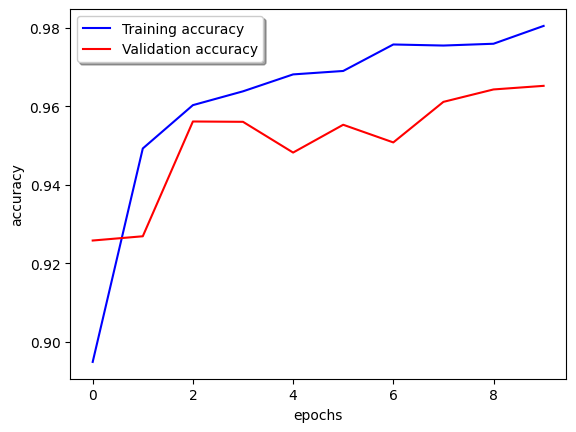

In [137]:
# Plot the classifier loss and accuracy curves for training and validation data
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.ylabel('accuracy')
plt.xlabel('epochs')

In [171]:
#Performance of the ResNet50MNIST Model for test data
model_ResNet50MNIST.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
loss, accuracy = model_ResNet50MNIST.evaluate(X, y)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

313/313 [==============================] - 59s 185ms/step - loss: 4.7019 - accuracy: 0.1158
Loss: 4.70186185836792
Accuracy: 0.11580000072717667


In [205]:
#save and load ResNet50MNIST Model
from keras.models import load_model
keras.backend.clear_session()
filename = 'output/Resnet50_modele.h5'
#model_ResNet50MNIST.save(filename)
ResNet50MNIST=load_model(filename)

In [206]:
# Update model_ResNet50MNIST to generate Unifom data
   #Update 1: Change the activation function of model_ResNet50MNIST from softmax to relu
   #Update 2: Added 1st dense layer in model_ResNet50MNIST with relu function
   #Update 3: Added 3nd dense layer in model_ResNet50MNIST with sigmoid function to bring the data in range 0-1
ResNet50MNIST.layers[-1].output.activation='relu'
new_layer1 = tf.keras.layers.Dense(256, activation='relu',name="uniform_dense1")(ResNet50MNIST.layers[-1].output)
new_layer2 = tf.keras.layers.Dense(128, activation='sigmoid',name="uniform_dense2")(new_layer1)

uniform_ResNet50MNIST = tf.keras.Model(inputs=ResNet50MNIST.inputs,outputs=[new_layer2])

uniform_ResNet50MNIST.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [207]:
print("We are making all the layers intrainable except the last two layers. \n")
for layer in uniform_ResNet50MNIST.layers[:-2]:
    layer.trainable=False
#modelv.summary()

We are making all the layers intrainable except the last two layers. 



In [262]:
#Defined the KL-divergence loss funcation
import numpy as np
def KLDiv(y_true, y_pred):
    #kl = tf.keras.losses.KLDivergence(reduction=tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE)
    kl = tf.keras.losses.KLDivergence()
    loss=kl(y_true, y_pred)
    return tf.reduce_mean(loss)

In [263]:
# Compiling the uniform_ResNet50MNIST
uniform_ResNet50MNIST.compile(loss=KLDiv, optimizer='SGD',metrics=KLDiv)
print("Model compilation completed.")

Model compilation completed.


In [213]:
#Generate the random uniform data as ground truth of training, validation and test data
ytrain_uniform=np.random.uniform(0,1,ytrain.shape[0])
yval_uniform=np.random.uniform(0,1,yval.shape[0])
ytest_uniform=np.random.uniform(0,1,y.shape[0])
print(ytrain_uniform.size)
print(yval_uniform.size)
print(ytest_uniform.size)

48000
12000
10000


In [264]:
#Train the uniform_ResNet50MNIST model to generate uniform data
history = uniform_ResNet50MNIST.fit(xtrain,ytrain_uniform,epochs=1,batch_size=128,verbose=True, validation_data=(xval,yval_uniform))
print("Fitting the model completed.")

375/375 [==============================] - 252s 662ms/step - loss: -32.0193 - KLDiv: -32.0193 - val_loss: -31.7971 - val_KLDiv: -31.7942
Fitting the model completed.


In [267]:
#Prediction on test data
yuniform_predict=uniform_ResNet50MNIST.predict(X)
print(yuniform_predict.shape)

313/313 [==============================] - 47s 150ms/step
(10000, 128)


In [268]:
#Uniformity test of generated data
from scipy import stats
stats.kstest(yuniform_predict.reshape(-1), 'uniform')

KstestResult(statistic=0.9998092608451843, pvalue=0.0, statistic_location=0.9998171, statistic_sign=-1)